## Data Wrangling: Data Cleaning

Now that the data has been sourced and consolidated into separate csv files for each city, I will further clean and  the data using pandas dataframes. I will also conduct some preliminary data exploration.

In [1]:
# import relevant packages
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
from langdetect import detect
%matplotlib inline

In [2]:
# establish the directory
directory = '/Users/limesncoconuts2/springboard_data/data_capstone_one/csv/'

### Test code idea a subset of data
Since I have a very large dataset scraped from the original webpage, I've decided to use a subset of the data for the present analysis. I will move forward with analysis on the files from Los Angeles.

In order to keep the data tidy and to preserve vital information about the data, I will add a column called 'city_name' each time a csv file is imported to preserve the information about which city the data corresponds to.

In [3]:
# import listings files for Los Angeles
# add a city column
city = 'los-angeles'
listings = pd.read_csv(directory + city + '_listings.csv')
listings['city_name'] = city

/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:2785: DtypeWarning: Columns (0,2,4,5,7,9,10,14,16,18,21,22,24,25,28,29,30,31,35,37,40,41,44,45,46,47,48,49,54,59,60,61,67,72,73,74,86,92,93,95) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [4]:
listings.head()

,access,accommodates,amenities,availability_30,availability_365,availability_60,availability_90,bathrooms,bed_type,bedrooms,...,square_feet,state,street,summary,thumbnail_url,transit,weekly_price_USD,xl_picture_url,zipcode,city_name
0,NaN,2.0,"{Internet,""Wireless Internet"",""Air Conditionin...",30.0,365,60,90.0,1,Real Bed,1,...,NaN,CA,"South 2nd Avenue, Arcadia, CA 91006, United St...","我們j位於Arcadia市中心,非常适合专业商務人士，学生，渡假遊學...鄰近高速公路,餐厅...",https://a0.muscache.com/ac/pictures/52102815/8...,聚集高尔夫球场，网球场，大型购物中心，影院，图书馆，大型街心公园，跑马场，医院，诊所。非常便...,650.0,https://a0.muscache.com/ac/pictures/52102815/8...,91006.0,los-angeles
1,NaN,1.0,"{TV,""Cable TV"",Internet,""Wireless Internet"",""A...",30.0,365,60,90.0,1,Real Bed,1,...,NaN,CA,"North Sycamore Avenue, Los Angeles, CA 90036, ...",Small but real clean apartment in Hancock Park...,https://a2.muscache.com/ac/pictures/23837943/9...,NaN,500.0,https://a2.muscache.com/ac/pictures/23837943/9...,90036.0,los-angeles
2,NaN,6.0,"{TV,""Cable TV"",Internet,""Wireless Internet"",""A...",0.0,24,0,0.0,3,Real Bed,3,...,NaN,CA,"Foothill Drive, Los Angeles, CA 90068, United ...","Originally built in 1922, this Italian-style v...",https://a1.muscache.com/ac/pictures/85102851/4...,NaN,NaN,https://a1.muscache.com/ac/pictures/85102851/4...,90068.0,los-angeles
3,NaN,1.0,"{TV,""Cable TV"",Internet,""Wireless Internet"",""A...",15.0,344,39,69.0,1,Couch,1,...,NaN,CA,"Club Dr, Los Angeles, CA 90064, United States",Extra comfy beanbag that can easily fit two.,https://a0.muscache.com/ac/pictures/74769434/8...,#12 Bus is 100 yards from the apartment and ru...,NaN,https://a0.muscache.com/ac/pictures/74769434/8...,90064.0,los-angeles
4,NaN,2.0,"{""Cable TV"",Internet,""Wireless Internet"",Kitch...",18.0,261,32,62.0,1,Real Bed,1,...,175.0,CA,"Martelo Ave, Pasadena, CA 91107, United States",NaN,https://a2.muscache.com/ac/pictures/7556540/fe...,NaN,350.0,https://a2.muscache.com/ac/pictures/7556540/fe...,91107.0,los-angeles


### Data Cleaning: Listings

Checking the number of entries and size of the dataframe:

In [5]:
listings.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 620453 entries, 0 to 620452
Data columns (total 98 columns):
access                              322669 non-null object
accommodates                        620419 non-null float64
amenities                           605932 non-null object
availability_30                     620439 non-null float64
availability_365                    620437 non-null object
availability_60                     620439 non-null object
availability_90                     620437 non-null float64
bathrooms                           618643 non-null object
bed_type                            620453 non-null object
bedrooms                            619830 non-null object
beds                                619471 non-null object
calculated_host_listings_count      620443 non-null float64
calendar_last_scraped               620443 non-null object
calendar_updated                    620453 non-null object
cancellation_policy                 605932 non-null object


**Column: Review Scores Rating**

Summary statistics of the reviews scores, the value that we are going to try to predict:

In [6]:
listings.review_scores_rating.describe()

count    474123.000000
mean         94.242865
std           8.335447
min          20.000000
25%          92.000000
50%          97.000000
75%         100.000000
max         100.000000
Name: review_scores_rating, dtype: float64

Calculate the amount of missing values for this column:

In [27]:
num_missing = listings.review_scores_rating.isna().sum()
len_col = len(listings.review_scores_rating)
# calculate percentage of missing data
percent_missing = (num_missing/len_col)*100

print('Percentage missing:', percent_missing)

Percentage missing: 23.584381089300884


Plot a histogram of review scores data:

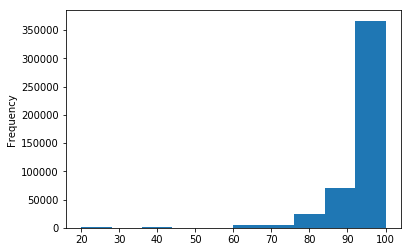

In [7]:
listings.review_scores_rating.plot('hist')

From the summary statistics and histogram, it's already evident that the review score data range from 20 to 100, with a mean of 94 and is clearly left skewed, with the majority of listings reviews being in the 90-range.

Plot boxplots of review scores per city:

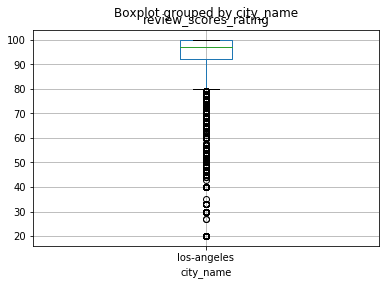

In [8]:
listings.boxplot(column='review_scores_rating', by='city_name')

The boxplot shows that the data is very right skewed, and that there are several outliers. These outliers are probably the very few Airbnb listings that receive poor ratings scores.

**Column: Price**

Changing the price column from object to a numeric type - this is another option for an attribute  we can predict: 

In [9]:
listings['price_USD'] = pd.to_numeric(listings['price_USD'], errors='coerce')

Summary statistics for price data:

In [10]:
listings.price_USD.describe()

count    608026.000000
mean        151.470664
std         705.170875
min           0.000000
25%          70.000000
50%         100.000000
75%         171.000000
max       90403.000000
Name: price_USD, dtype: float64

Calculate the amount of missing values for this column:

In [28]:
num_missing = listings.price_USD.isna().sum()
len_col = len(listings.price_USD)
# calculate percentage of missing data
percent_missing = (num_missing/len_col)*100

print('Percentage missing:', percent_missing)

Percentage missing: 2.0028914357735395


Since only 2% of price data is missing (versus almost 23% for ratings data), it might be a better idea to try to predict the price metric, and to remove rows in the dataframe that do not have price data.

Plot a histogram of price data:

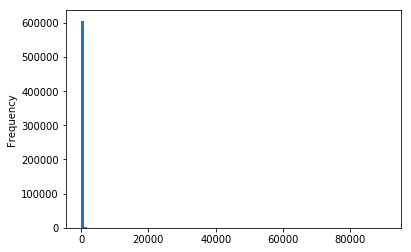

In [11]:
listings.price_USD.plot('hist', bins=100)

The summary statistics and histogram show that the price data range from 0 to 90,403 dollars, with a mean of about 151 dollars and is clearly right skewed, with the majority of listings reviews being in the low hundreds.

Plot boxplots of price per city:

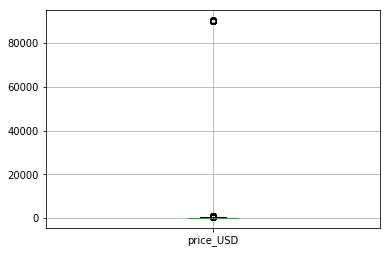

In [12]:
listings.boxplot(column='price_USD')

The boxplot shows that the data is extremely right skewed, and that there are several outliers. These outliers are probably the very few Airbnb listings that are likely very upscale and have expensive prices.

#### Tidying Data:
Process 'amenities' columns, which is presently a string containing a list of amenities at that listing. I want to turn each amenity into a separate column of boolean type.  

In [13]:
listings['amenities'] = listings.amenities.str.replace('{','').str.replace('}','').str.replace('"','')

In [14]:
listings.amenities.value_counts(dropna=False)

NaN                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                     14521
                                                                                                                                                                                                                                                                                                                                                                                                                          

### Data Cleaning: Reviews

Checking the number of entries and size of the dataframe:

In [3]:
# import reviews files for Los Angeles
# add a city column
city = 'los-angeles'
reviews = pd.read_csv(directory + city + '_reviews.csv')
reviews['city_name'] = city

In [4]:
reviews.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14198249 entries, 0 to 14198248
Data columns (total 8 columns):
listing_id       int64
id               int64
date             object
reviewer_id      int64
reviewer_name    object
comments         object
date_recorded    object
city_name        object
dtypes: int64(3), object(5)
memory usage: 8.8 GB


In [5]:
reviews.head()

,listing_id,id,date,reviewer_id,reviewer_name,comments,date_recorded,city_name
0,7680552,50209733,2015-10-10,43618076,Paul,Was a great stay! Host was very helpful.,2017-03-02,los-angeles
1,7680552,50521911,2015-10-12,44347928,Dwendalyz,It was a beautiful home. The kitchen view was ...,2017-03-02,los-angeles
2,7680552,53635576,2015-11-10,31371772,Varunn,The house is a very beautiful house with a gre...,2017-03-02,los-angeles
3,7680552,54673483,2015-11-22,2530719,Lina,Stunning house ! Very clean and comfortable i...,2017-03-02,los-angeles
4,7680552,57881891,2015-12-30,2357565,Sage,Servando was easy to get ahold of as well as p...,2017-03-02,los-angeles


#### Remove non-English reviews
Since the sentiment analysis I will do only considers the syntax of English, I will remove rows of the dataframe with non-English reviews:

In [4]:
for comment in reviews['comments'][0:5]:
    print(comment)

Was a great stay! Host was very helpful. 
It was a beautiful home. The kitchen view was my favorite but I was overall pleased and so were my other friends. I appreciated the communication the host had with me. He was accommodating to my needs since I had a large party. I had a chance to meet him and he was an all around friendly person. I would definitely book here again in the future. 
The house is a very beautiful house with a great view. Steve (Servando) was very polite and courteous. I certainly recommend this place to others looking for a great house in Los Angeles. 
Stunning house ! Very clean and comfortable  in beautiful Area with amazing view. 
It was simply the perfect place and location . 
The host was more than great . If I am in the area again I will definitely book the house again.  
Servando was easy to get ahold of as well as prompt and friendly in all communications. The place itself is lovely and spacious with an incredible view of downtown Los Angeles from the living

In [ ]:
lang = []

for comment in reviews['comments']:
    try:
        lang.append(detect(comment))
    except: #NaN
        lang.append('')

lang = pd.Series(lang)
reviews['language'] = lang.values

In [ ]:
reviews.language.head()

In [ ]:
reviews.language.value_counts(dropna=False)

In [35]:
# only keep English reviews in the dataframe
reviews = reviews[reviews.language == 'en']